In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

654

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df7e1a45d4925410a8ba4c0d3e685ca0


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.  Record numbers 1-50 and the set counter - how many sets of 50
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

#Group cities in sets of 50 for logging purposes.
#   if (i % 50 == 0 and i >= 50):
#       set_count += 1
#       record_count = 1
# Create endpoint URL with each city.
#   city_url = url + "&q=" + "i"
    
#i uses the indexing in the cities_list so have to create another for loop to get the city from the cities list
#enumerate method
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. 
    #If the remainder of the index divided by 50 ==0 and if the index is greater than or equal to 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
      
    # Create endpoint URL with each city.  replace blanks with "+" which finds the weather for the city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | saint-joseph
Processing Record 8 of Set 1 | plettenberg bay
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint-augustin
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | damietta
Processing Record 16 of Set 1 | wanning
Processing Record 17 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 18 of Set 1 | hondo
Processing Record 19 of Set 1 | coihaique
Processing Record 20 of Set 1 | las choapas
Processing Record 21 of Set 1 | salalah
Pro

Processing Record 37 of Set 4 | manali
Processing Record 38 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | port moresby
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 45 of Set 4 | dalhousie
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | poum
Processing Record 50 of Set 4 | senneterre
Processing Record 1 of Set 5 | baykit
Processing Record 2 of Set 5 | soyo
Processing Record 3 of Set 5 | rochester
Processing Record 4 of Set 5 | havre-saint-pierre
Processing Record 5 of Set 5 | kalmunai
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | altay
Processing Record 8 of Set 5 | wasilla
Processing Re

Processing Record 24 of Set 8 | cockburn town
Processing Record 25 of Set 8 | cabedelo
Processing Record 26 of Set 8 | codrington
Processing Record 27 of Set 8 | phangnga
Processing Record 28 of Set 8 | tunduru
City not found. Skipping...
Processing Record 29 of Set 8 | celestun
Processing Record 30 of Set 8 | grand gaube
Processing Record 31 of Set 8 | trelew
Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | worpswede
Processing Record 34 of Set 8 | totness
Processing Record 35 of Set 8 | vodnyy
Processing Record 36 of Set 8 | awjilah
Processing Record 37 of Set 8 | liwale
Processing Record 38 of Set 8 | leshukonskoye
Processing Record 39 of Set 8 | san jeronimo
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | starkville
Processing Record 42 of Set 8 | sandanski
Processing Record 43 of Set 8 | talnakh
Processing Record 44 of Set 8 | kudahuvadhoo
Processing Record 45 of Set 8 | mar del plata
Processing Record 46 of Set 8 | venado tuerto
Pr

Processing Record 14 of Set 12 | yantongshan
Processing Record 15 of Set 12 | northport
Processing Record 16 of Set 12 | ballina
Processing Record 17 of Set 12 | barawe
City not found. Skipping...
Processing Record 18 of Set 12 | murmashi
Processing Record 19 of Set 12 | surt
Processing Record 20 of Set 12 | morehead
Processing Record 21 of Set 12 | great bend
Processing Record 22 of Set 12 | halifax
Processing Record 23 of Set 12 | japura
Processing Record 24 of Set 12 | sarkand
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | isla mujeres
Processing Record 28 of Set 12 | umm kaddadah
Processing Record 29 of Set 12 | voh
Processing Record 30 of Set 12 | mangrol
Processing Record 31 of Set 12 | mujiayingzi
Processing Record 32 of Set 12 | tocopilla
Processing Record 33 of Set 12 | bocana de paiwas
Processing Record 34 of Set 12 | sobolevo
Processing Record 35 of Set 12 | port jervis
Processing Record 36 of Set 12 |

In [10]:
len(city_data)


595

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.69,128.87,12.87,93,100,18.28,RU,2020-10-20 12:51:55
1,Mount Gambier,-37.83,140.77,46.40,93,100,5.82,AU,2020-10-20 12:51:55
2,Mataura,-46.19,168.86,46.99,81,86,1.01,NZ,2020-10-20 12:51:55
3,Marrakesh,31.63,-8.01,95.00,16,40,19.46,MA,2020-10-20 12:51:55
4,Puerto Ayora,-0.74,-90.35,70.00,90,97,8.99,EC,2020-10-20 12:51:56
5,Saint-Joseph,-21.37,55.62,78.80,69,36,21.92,RE,2020-10-20 12:51:56
6,Plettenberg Bay,-34.05,23.37,65.14,56,0,13.20,ZA,2020-10-20 12:51:56
7,Qaanaaq,77.48,-69.36,25.25,84,0,8.90,GL,2020-10-20 12:51:56
8,Punta Arenas,-53.15,-70.92,44.60,65,75,20.80,CL,2020-10-20 12:47:58
9,Rikitea,-23.12,-134.97,73.17,79,13,12.68,PF,2020-10-20 12:51:56


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

#assign the same dataframe to new column order

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2020-10-20 12:51:55,71.69,128.87,12.87,93,100,18.28
1,Mount Gambier,AU,2020-10-20 12:51:55,-37.83,140.77,46.40,93,100,5.82
2,Mataura,NZ,2020-10-20 12:51:55,-46.19,168.86,46.99,81,86,1.01
3,Marrakesh,MA,2020-10-20 12:51:55,31.63,-8.01,95.00,16,40,19.46
4,Puerto Ayora,EC,2020-10-20 12:51:56,-0.74,-90.35,70.00,90,97,8.99
5,Saint-Joseph,RE,2020-10-20 12:51:56,-21.37,55.62,78.80,69,36,21.92
6,Plettenberg Bay,ZA,2020-10-20 12:51:56,-34.05,23.37,65.14,56,0,13.20
7,Qaanaaq,GL,2020-10-20 12:51:56,77.48,-69.36,25.25,84,0,8.90
8,Punta Arenas,CL,2020-10-20 12:47:58,-53.15,-70.92,44.60,65,75,20.80
9,Rikitea,PF,2020-10-20 12:51:56,-23.12,-134.97,73.17,79,13,12.68


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/20/20'

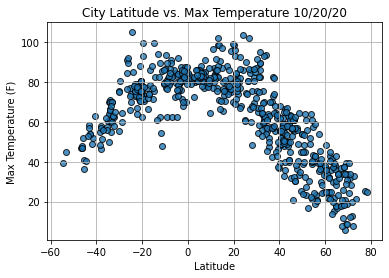

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

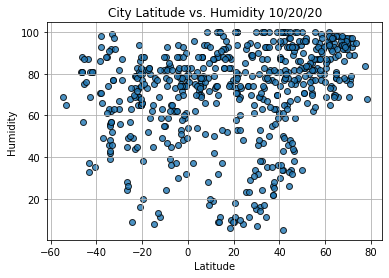

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

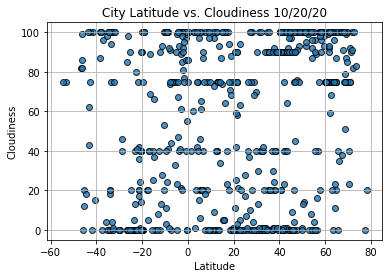

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

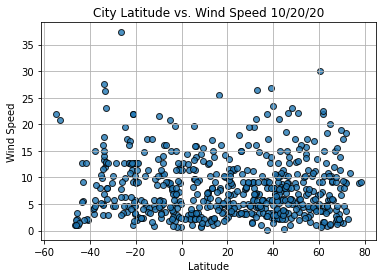

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2020-10-20 12:51:55,71.69,128.87,12.87,93,100,18.28
3,Marrakesh,MA,2020-10-20 12:51:55,31.63,-8.01,95.00,16,40,19.46
7,Qaanaaq,GL,2020-10-20 12:51:56,77.48,-69.36,25.25,84,0,8.90
10,Saint-Augustin,CA,2020-10-20 12:51:56,51.23,-58.65,44.69,83,100,3.44
12,Kapaa,US,2020-10-20 12:51:57,22.08,-159.32,73.99,80,21,8.52


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

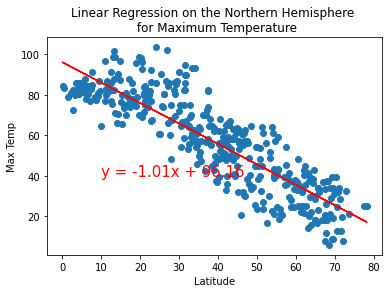

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

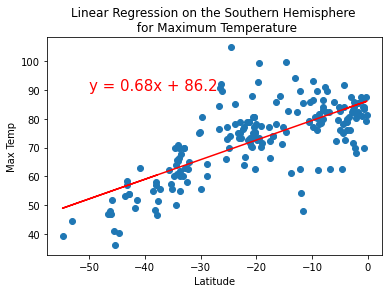

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

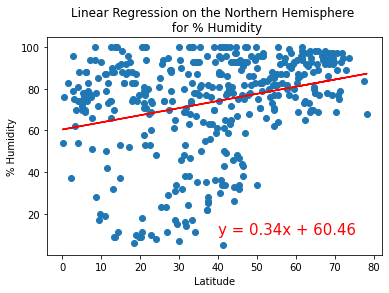

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

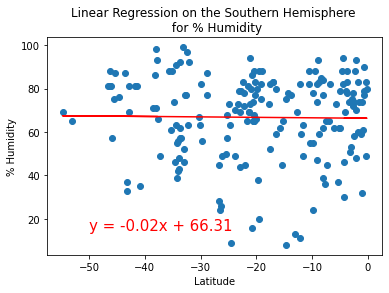

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

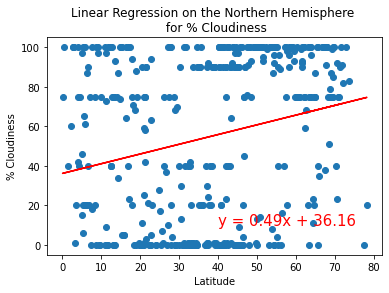

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

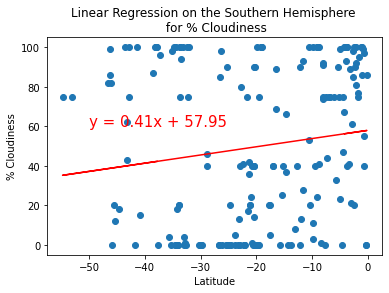

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

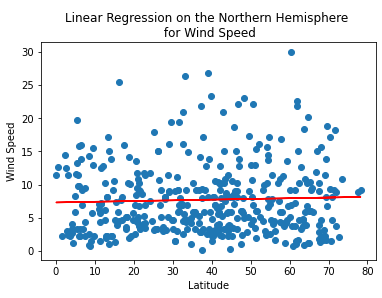

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

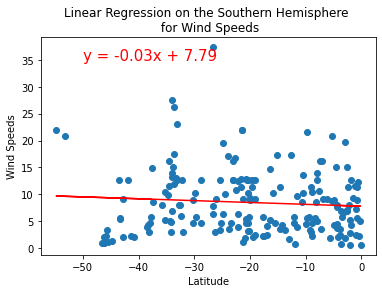

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speeds', 'Wind Speeds',(-50,35))